<a href="https://colab.research.google.com/github/rajy4683/S15FinalRun/blob/master/S15EVA4_FinalInputs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!nvidia-smi

Mon May 25 15:20:44 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 440.82       Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   33C    P0    25W / 250W |      0MiB / 16280MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [2]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

import sys

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
sys.path.append('/content/drive/My Drive/EVA4/RekogNizer')
sys.path.append('/content/drive/My Drive/EVA4')
sys.path.append('/content/drive/My Drive/EVA4/DenseDepth')

### Dependencies


In [4]:
!pip install -r /content/drive/My\ Drive/EVA4/RekogNizer/requirements.txt

     |████████████████████████████████| 112kB 2.7MB/s 
     |████████████████████████████████| 1.4MB 4.8MB/s 
     |████████████████████████████████| 163kB 13.0MB/s 
     |████████████████████████████████| 112kB 12.3MB/s 
     |████████████████████████████████| 102kB 7.0MB/s 
     |████████████████████████████████| 102kB 7.8MB/s 
     |████████████████████████████████| 460kB 11.9MB/s 
     |████████████████████████████████| 634kB 16.2MB/s 
     |████████████████████████████████| 71kB 8.3MB/s 
     |████████████████████████████████| 71kB 6.9MB/s 
  Created wheel for subprocess32: filename=subprocess32-3.5.4-cp36-none-any.whl size=6489 sha256=324d913a4d414d8068998dce1bd873d7e744f457c58f04abdee93a8505a167f1
  Stored in directory: /root/.cache/pip/wheels/68/39/1a/5e402bdfdf004af1786c8b853fd92f8c4a04f22aad179654d1
  Created wheel for watchdog: filename=watchdog-0.10.2-cp36-none-any.whl size=73605 sha256=6f4b03d14bd4d5c952e852bfc95b26a6555256e033d5c2f8ae126937d9f4d20c
  Stored in directory: 

In [5]:
!pip install -U git+https://github.com/albu/albumentations

  Cloning https://github.com/albu/albumentations to /tmp/pip-req-build-d40rj5na
  Running command git clone -q https://github.com/albu/albumentations /tmp/pip-req-build-d40rj5na
  Created wheel for albumentations: filename=albumentations-0.4.5-cp36-none-any.whl size=65038 sha256=1c9569ddcfa2971a97ad3f348ca10bfa18de615ccc78a39d29e26427f39c9bb4
  Stored in directory: /tmp/pip-ephem-wheel-cache-kd0hvdw7/wheels/45/8b/e4/2837bbcf517d00732b8e394f8646f22b8723ac00993230188b
Successfully built albumentations
  Found existing installation: albumentations 0.1.12
    Uninstalling albumentations-0.1.12:
      Successfully uninstalled albumentations-0.1.12


In [6]:
!wandb login a6f947d2d2f69e7a8c8ca0f69811fd554f27d204


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
Successfully logged in to Weights & Biases!


In [0]:
import os

import numpy as np
import cv2
from matplotlib import pyplot as plt
from skimage.color import label2rgb

import albumentations as A
import random
from google.colab.patches import cv2_imshow
from PIL import Image
import glob
import pandas as pd

import torch
from zipfile import ZipFile
import re
import h5py
import time



In [8]:
%load_ext autoreload
%autoreload 2
import torch
import torchvision
import torchvision.transforms as transforms
from RekogNizer import hyperparams


from albumentations import Compose, RandomCrop, Normalize, HorizontalFlip, Resize, Cutout, MotionBlur
from albumentations import (
    HorizontalFlip, Compose, RandomCrop, Cutout,Normalize, HorizontalFlip, RandomBrightnessContrast,
    Resize,RandomSizedCrop, MotionBlur,MultiplicativeNoise,InvertImg, IAAFliplr,
	IAAPerspective,
)
from albumentations.pytorch import ToTensor
import random

from torchvision.datasets.vision import VisionDataset
from torchvision.datasets.utils import check_integrity, download_and_extract_archive
import os
import sys
import numpy as np
from torchvision import datasets
#from RekogNizer import imgnetloader
from RekogNizer import basemodelclass
from RekogNizer import mmdlrfinder

from RekogNizer import mmdtraintest
from RekogNizer import mmddataloader
from RekogNizer import mmdlosses
from RekogNizer import mmdmodels

from RekogNizer import hyperparams
from RekogNizer import fileutils

from torch.utils.data import Dataset
import shutil
from tqdm import tqdm
from RekogNizer import mmdmodels

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.optim.lr_scheduler import StepLR, OneCycleLR, MultiStepLR, CyclicLR, ReduceLROnPlateau


import kornia

import cv2
import numpy as np
import matplotlib.pyplot as plt
from torchsummary import summary
import wandb

  pip install torch-lr-finder -v --global-option="amp"
  pip install torch-lr-finder -v --global-option="amp"


### Mask Image (Mean and Variance
Mask Mean:0.057950844077600344, Mask StdDev:0.0016620444341229432
### Depth mean and Variance
Depth Mean:0.3679109312239146, Depth StdDev:0.03551773442719045

In [0]:
!rm -rf /content/train && mkdir -p /content/train
!rm -rf /content/test && mkdir -p /content/test

### Dataloaders

In [0]:
from RekogNizer import mmddataloader
tqdm._instances.clear()
train_loader, test_loader = mmddataloader.get_train_test_loader(200000, 
                                                  280000, 
                                                  64,
                                                  0, 
                                                  10000,
                                                  64,
                                                  (224,224),
                                                  unzip_orig_files=True)

depth_mask_gt_2k6k.zip depth_image_340c50bfb6_mylobby_8.jpg:   1%|          | 135/26501 [04:58<16:13:08,  2.21s/it]


Extracting image and mask files


image_mask_gt1k2k.zip mask_24876ff1d9_classroom_14.jpg: 100%|██████████| 26298/26298 [00:52<00:00, 505.60it/s]
image_mask_gt2k6k.zip image_1c76373679_corridor11.jpg:  12%|█▏        | 6140/53002 [00:21<02:20, 333.85it/s]

## LR Range Finder

In [0]:
device = torch.device("cuda" if not hyperparams.hyperparameter_defaults['no_cuda'] else "cpu")
model_new  =mmdmodels.UNet(n_channels=6, n_classes=2)

expand_model  =mmdmodels.CustomUNet(model_new,n_channels=6, n_classes=2)

In [0]:
from RekogNizer import mmdtraintest
from RekogNizer import mmdlosses

criterion={"mask":[mmdlosses.dice_loss, mmdlosses.LocalL1Loss], 
           "depth":[mmdlosses.LocalRMSELoss, mmdlosses.LocalSSIMLoss]}

#criterion={"mask":[mmdlosses.dice_loss, mmdlosses.LocalBCELoss, mmdlosses.LocalSSIMLoss ], "depth":[mmdlosses.LocalRMSELoss]}
#model = basemodelclass.MonoMaskDepthResNetFunc()
optimizer=optim.SGD(expand_model_params, lr=0.001,momentum=0.9,  weight_decay=0)
lrfinder = mmdtraintest.find_lr_type1(expand_model, optimizer, criterion, train_loader, testloader=None, seed=1, start_lr=0.0001, end_lr=1, step_mode="exp",num_iter=100)



Learning rate search finished. See the graph with {finder_name}.plot()


0.02754228703338166 1.0 1.0897459983825684
{'lr': [0.00010964781961431851, 0.0001202264434617413, 0.0001318256738556407, 0.00014454397707459274, 0.00015848931924611136, 0.00017378008287493755, 0.00019054607179632473, 0.00020892961308540398, 0.00022908676527677731, 0.000251188643150958, 0.0002754228703338166, 0.00030199517204020164, 0.00033113112148259116, 0.0003630780547701014, 0.00039810717055349724, 0.00043651583224016605, 0.00047863009232263843, 0.0005248074602497726, 0.000575439937337157, 0.0006309573444801934, 0.0006918309709189364, 0.0007585775750291837, 0.0008317637711026711, 0.0009120108393559097, 0.001, 0.0010964781961431851, 0.0012022644346174132, 0.0013182567385564075, 0.0014454397707459273, 0.0015848931924611134, 0.0017378008287493754, 0.0019054607179632473, 0.00208929613085404, 0.0022908676527677737, 0.0025118864315095794, 0.0027542287033381664, 0.003019951720402016, 0.0033113112148259113, 0.0036307805477010144, 0.003981071705534973, 0.004365158322401658, 0.004786300923226

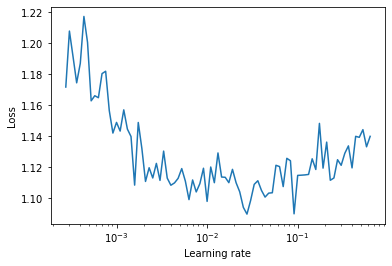

In [0]:
min_lr = lrfinder.history['lr'][np.argmin(lrfinder.history['loss'])]
max_lr = np.max(lrfinder.history['lr'])
print(min_lr, max_lr, np.min(lrfinder.history['loss']))
print(lrfinder.history)
lrfinder.plot()

In [0]:
lrfinder.reset()

In [0]:
summary(expand_model, input_size=(6,64,64)  )

In [0]:
expand_model = mmdtraintest.load_model_for_infer(expand_model, 
                                  #'/content/drive/My Drive/EVA4/model_saves/model-33e4abd6ba.h5',
                                  '/content/drive/My Drive/EVA4/model_saves/model-2826169092.h5',
                                  device)


## Inferencing

In [0]:
device = torch.device("cuda" if not hyperparams.hyperparameter_defaults['no_cuda'] else "cpu")
model_new  =mmdmodels.UNet(n_channels=6, n_classes=2)

model_new = mmdtraintest.load_model_for_infer(model_new, 
                                  '/content/drive/My Drive/EVA4/model_saves/model-10c477f01a.h5',
                                  device)


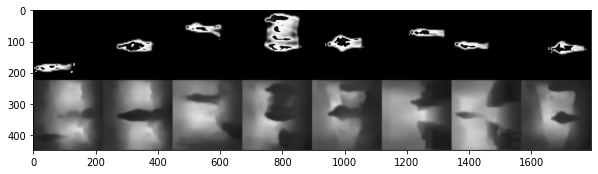

In [0]:
cmap='gray'
img = iter(test_loader).next()
with torch.no_grad():
    output_val = expand_model(img['input'].to(device)).to("cpu")
output_pred = torch.split(output_val,1,dim=1)
# mask_pred = [kornia.tensor_to_image(((output_pred[0][val].to("cpu")*0.0016620444341229432+0.057950844077600344)*255).byte()) for val in range(8) ]
# depth_pred = [kornia.tensor_to_image(((output_pred[1][val].to("cpu")*0.03551773442719045+0.3679109312239146)*255).byte()) for val in range(8) ]

mask_pred = [kornia.tensor_to_image((output_pred[0][val].to("cpu")*255).byte()) for val in range(8) ]
depth_pred = [kornia.tensor_to_image((output_pred[1][val].to("cpu")*255).byte()) for val in range(8) ]


img_shape = img['output'][0][1].shape[1]
mask_gt = [img['output'][0][val].reshape(img_shape,img_shape) for val in range(8) ]
depth_gt = [img['output'][1][val].reshape(img_shape,img_shape) for val in range(8) ]
plt.figure(figsize=(10,10)) 
plt.imshow(np.vstack([np.hstack(mask_pred),np.hstack(depth_pred)]),cmap=cmap)

## Training Loops

### Training Stage-2 BaseLine
#### In this stage only the Top 2 Layers were trained. This was acheived by passing only the top 2 layers parameters to the optimizer
```
model_new ---> Base Model trained at 56x56 resolution

model_new_params = ['baseUNet.'+param[0] for param in list(model_new.named_parameters()) ]
expand_model_params = [param[1] for param in list(expand_model.named_parameters()) if param[0] not in model_new_params]
```

In [0]:
######## OCP 
from RekogNizer import mmdmodels
device = torch.device("cuda" if not hyperparams.hyperparameter_defaults['no_cuda'] else "cpu")
tqdm._instances.clear()
hyperparams.set_hyperparam({"epochs":10})

hyperparams.hyperparameter_defaults['run_name'] = fileutils.rand_run_name()
hyperparams.hyperparameter_defaults['epochs'] = 40
hyperparams.hyperparameter_defaults['lr'] = 0.1
hyperparams.hyperparameter_defaults['ocp_max_lr'] = 0.1

print("Initializing datasets and dataloaders")    

wandb_run_init = wandb.init(config=hyperparams.hyperparameter_defaults, 
                            project=hyperparams.hyperparameter_defaults['project'])
config = wandb.config
print(config)

########### 
#model_new_params = ['baseUNet.'+param[0] for param in list(model_new.named_parameters()) ]
#expand_model_params = [param[1] for param in list(expand_model.named_parameters()) if param[0] not in model_new_params]
optimizer=optim.SGD(expand_model_params, lr=config.lr,momentum=config.momentum,
                        weight_decay=1e-5)
#expand_model_params
# criterion={"mask":[mmdlosses.dice_loss, mmdlosses.LocalBCELoss, mmdlosses.LocalPixelLoss], 
#            "depth":[mmdlosses.LocalRMSELoss, mmdlosses.LocalSSIMLoss]}

criterion={"mask":[mmdlosses.dice_loss, mmdlosses.LocalL1Loss], 
           "depth":[mmdlosses.LocalRMSELoss, mmdlosses.LocalSSIMLoss]}

#scheduler = ReduceLROnPlateau(optimizer, mode='min', factor=0.5, patience=2, verbose=True, threshold=0.0001)
scheduler = OneCycleLR(optimizer, 
                        config.ocp_max_lr, 
                        epochs=config.epochs, 
                        cycle_momentum=True, 
                        steps_per_epoch=len(train_loader), 
                        base_momentum=config.momentum,
                        max_momentum=0.95, 
                        pct_start=0.208,
                        anneal_strategy=config.anneal_strategy,
                        div_factor=config.div_factor,
                        final_div_factor=config.final_div_factor
                           )

final_model_path = mmdtraintest.execute_model(expand_model, 
            hyperparams.hyperparameter_defaults, 
            train_loader, test_loader, 
            device, 
            wandb=wandb,
            optimizer_in=optimizer,
            scheduler=scheduler,
            prev_saved_model=None,
            criterion=criterion,
            save_best=True,
            lars_mode=False,
            batch_step=True)

Initializing datasets and dataloaders


  0%|          | 0/782 [00:00<?, ?it/s]

wandb_version: 1

_wandb:
  desc: null
  value:
    cli_version: 0.8.36
    framework: torch
    is_jupyter_run: true
    is_kaggle_kernel: false
    python_version: 3.6.9
anneal_strategy:
  desc: null
  value: linear
batch_size:
  desc: null
  value: 512
bias:
  desc: null
  value: false
cycle_momentum:
  desc: null
  value: false
div_factor:
  desc: null
  value: 128
dropout:
  desc: null
  value: 0.1
epochs:
  desc: null
  value: 40
factor:
  desc: null
  value: 0.0
final_div_factor:
  desc: null
  value: 64
lr:
  desc: null
  value: 0.1
lr_decay_threshold:
  desc: null
  value: 0.0
lr_policy:
  desc: null
  value: ocp
momentum:
  desc: null
  value: 0.9
no_cuda:
  desc: null
  value: false
ocp_max_lr:
  desc: null
  value: 0.1
pct_start:
  desc: null
  value: 0.208
project:
  desc: null
  value: news5
run_name:
  desc: null
  value: 150cfeb3dc
sched_lr_gamma:
  desc: null
  value: 0.5
sched_lr_step:
  desc: null
  value: 1
seed:
  desc: null
  value: 1
split_pct:
  desc: null
  val

loss=0.947564 m_loss=0.868694 d_loss=0.078870 batch_id=781: 100%|██████████| 782/782 [16:07<00:00,  1.24s/it]
loss=0.943330 m_loss=0.866382 d_loss=0.076948 batch_id=78: 100%|██████████| 79/79 [00:42<00:00,  1.87it/s]



Epoch: 1 Train set: Average loss: 0.945764, Mask loss:0.877973, Depth loss:0.067791, lr:0
Epoch: 1 Test set: Average loss: 0.950553, Mask loss:0.878275, Depth loss:0.072278
Model saved as Test loss reduced from  10000.0  to  0.950553098811379


loss=0.947263 m_loss=0.868656 d_loss=0.078608 batch_id=781: 100%|██████████| 782/782 [16:08<00:00,  1.24s/it]
loss=0.943342 m_loss=0.866420 d_loss=0.076922 batch_id=78: 100%|██████████| 79/79 [00:42<00:00,  1.86it/s]



Epoch: 2 Train set: Average loss: 0.945699, Mask loss:0.877965, Depth loss:0.067734, lr:0
Epoch: 2 Test set: Average loss: 0.950518, Mask loss:0.878267, Depth loss:0.072251
Model saved as Test loss reduced from  0.950553098811379  to  0.9505183915548687


loss=0.947146 m_loss=0.868642 d_loss=0.078504 batch_id=781: 100%|██████████| 782/782 [16:08<00:00,  1.24s/it]
loss=0.943369 m_loss=0.866434 d_loss=0.076934 batch_id=78: 100%|██████████| 79/79 [00:42<00:00,  1.88it/s]



Epoch: 3 Train set: Average loss: 0.945629, Mask loss:0.877957, Depth loss:0.067672, lr:0
Epoch: 3 Test set: Average loss: 0.950501, Mask loss:0.878275, Depth loss:0.072225
Model saved as Test loss reduced from  0.9505183915548687  to  0.9505007817775388


loss=0.946892 m_loss=0.868615 d_loss=0.078277 batch_id=781: 100%|██████████| 782/782 [16:07<00:00,  1.24s/it]
loss=0.943463 m_loss=0.866457 d_loss=0.077006 batch_id=78: 100%|██████████| 79/79 [00:42<00:00,  1.85it/s]



Epoch: 4 Train set: Average loss: 0.945567, Mask loss:0.877950, Depth loss:0.067617, lr:0
Epoch: 4 Test set: Average loss: 0.950467, Mask loss:0.878273, Depth loss:0.072194
Model saved as Test loss reduced from  0.9505007817775388  to  0.9504670048061805


loss=0.946730 m_loss=0.868623 d_loss=0.078107 batch_id=781: 100%|██████████| 782/782 [16:11<00:00,  1.24s/it]
loss=0.943522 m_loss=0.866457 d_loss=0.077065 batch_id=78: 100%|██████████| 79/79 [00:42<00:00,  1.86it/s]



Epoch: 5 Train set: Average loss: 0.945503, Mask loss:0.877943, Depth loss:0.067560, lr:0
Epoch: 5 Test set: Average loss: 0.950448, Mask loss:0.878261, Depth loss:0.072186
Model saved as Test loss reduced from  0.9504670048061805  to  0.9504477706136583


loss=0.946439 m_loss=0.868612 d_loss=0.077827 batch_id=781: 100%|██████████| 782/782 [16:08<00:00,  1.24s/it]
loss=0.943553 m_loss=0.866473 d_loss=0.077081 batch_id=78: 100%|██████████| 79/79 [00:42<00:00,  1.85it/s]



Epoch: 6 Train set: Average loss: 0.945441, Mask loss:0.877936, Depth loss:0.067505, lr:0
Epoch: 6 Test set: Average loss: 0.950391, Mask loss:0.878240, Depth loss:0.072151
Model saved as Test loss reduced from  0.9504477706136583  to  0.9503912276859525


loss=0.946313 m_loss=0.868577 d_loss=0.077736 batch_id=781: 100%|██████████| 782/782 [16:08<00:00,  1.24s/it]
loss=0.943457 m_loss=0.866503 d_loss=0.076953 batch_id=78: 100%|██████████| 79/79 [00:42<00:00,  1.86it/s]



Epoch: 7 Train set: Average loss: 0.945381, Mask loss:0.877929, Depth loss:0.067452, lr:0
Epoch: 7 Test set: Average loss: 0.950352, Mask loss:0.878237, Depth loss:0.072116
Model saved as Test loss reduced from  0.9503912276859525  to  0.9503522620925421


loss=0.946176 m_loss=0.868595 d_loss=0.077581 batch_id=781: 100%|██████████| 782/782 [16:10<00:00,  1.24s/it]
loss=0.943578 m_loss=0.866488 d_loss=0.077090 batch_id=78: 100%|██████████| 79/79 [00:42<00:00,  1.85it/s]



Epoch: 8 Train set: Average loss: 0.945320, Mask loss:0.877922, Depth loss:0.067399, lr:0
Epoch: 8 Test set: Average loss: 0.950346, Mask loss:0.878241, Depth loss:0.072105
Model saved as Test loss reduced from  0.9503522620925421  to  0.9503458564794516


loss=0.945994 m_loss=0.868587 d_loss=0.077407 batch_id=781: 100%|██████████| 782/782 [16:07<00:00,  1.24s/it]
loss=0.943360 m_loss=0.866479 d_loss=0.076881 batch_id=78: 100%|██████████| 79/79 [00:42<00:00,  1.86it/s]



Epoch: 9 Train set: Average loss: 0.945262, Mask loss:0.877916, Depth loss:0.067346, lr:0
Epoch: 9 Test set: Average loss: 0.950314, Mask loss:0.878232, Depth loss:0.072082
Model saved as Test loss reduced from  0.9503458564794516  to  0.9503139612040942


loss=0.945725 m_loss=0.868588 d_loss=0.077137 batch_id=781: 100%|██████████| 782/782 [16:07<00:00,  1.24s/it]
loss=0.943416 m_loss=0.866488 d_loss=0.076928 batch_id=78: 100%|██████████| 79/79 [00:42<00:00,  1.86it/s]



Epoch: 10 Train set: Average loss: 0.945206, Mask loss:0.877909, Depth loss:0.067297, lr:0
Epoch: 10 Test set: Average loss: 0.950305, Mask loss:0.878242, Depth loss:0.072063
Model saved as Test loss reduced from  0.9503139612040942  to  0.9503046115742454


loss=0.945523 m_loss=0.868559 d_loss=0.076963 batch_id=781: 100%|██████████| 782/782 [16:07<00:00,  1.24s/it]
loss=0.943575 m_loss=0.866439 d_loss=0.077135 batch_id=78: 100%|██████████| 79/79 [00:43<00:00,  1.83it/s]



Epoch: 11 Train set: Average loss: 0.945150, Mask loss:0.877903, Depth loss:0.067247, lr:0
Epoch: 11 Test set: Average loss: 0.950267, Mask loss:0.878223, Depth loss:0.072044
Model saved as Test loss reduced from  0.9503046115742454  to  0.9502670319774483


loss=0.945411 m_loss=0.868546 d_loss=0.076865 batch_id=781: 100%|██████████| 782/782 [16:09<00:00,  1.24s/it]
loss=0.943766 m_loss=0.866461 d_loss=0.077305 batch_id=78: 100%|██████████| 79/79 [00:42<00:00,  1.87it/s]



Epoch: 12 Train set: Average loss: 0.945094, Mask loss:0.877896, Depth loss:0.067197, lr:0
Epoch: 12 Test set: Average loss: 0.950265, Mask loss:0.878231, Depth loss:0.072034
Model saved as Test loss reduced from  0.9502670319774483  to  0.950264927707141


loss=0.945154 m_loss=0.868552 d_loss=0.076602 batch_id=781: 100%|██████████| 782/782 [16:05<00:00,  1.23s/it]
loss=0.943641 m_loss=0.866480 d_loss=0.077161 batch_id=78: 100%|██████████| 79/79 [00:42<00:00,  1.87it/s]



Epoch: 13 Train set: Average loss: 0.945041, Mask loss:0.877891, Depth loss:0.067151, lr:0
Epoch: 13 Test set: Average loss: 0.950214, Mask loss:0.878217, Depth loss:0.071997
Model saved as Test loss reduced from  0.950264927707141  to  0.9502139604544337


loss=0.945182 m_loss=0.868543 d_loss=0.076639 batch_id=781: 100%|██████████| 782/782 [16:08<00:00,  1.24s/it]
loss=0.943583 m_loss=0.866442 d_loss=0.077141 batch_id=78: 100%|██████████| 79/79 [00:42<00:00,  1.86it/s]



Epoch: 14 Train set: Average loss: 0.944988, Mask loss:0.877885, Depth loss:0.067103, lr:0
Epoch: 14 Test set: Average loss: 0.950192, Mask loss:0.878215, Depth loss:0.071977
Model saved as Test loss reduced from  0.9502139604544337  to  0.9501917150956166


loss=0.948978 m_loss=0.882227 d_loss=0.066750 batch_id=597:  76%|███████▋  | 598/782 [12:23<03:46,  1.23s/it]WARNING:wandb.util:requests_with_retry encountered retryable exception: 500 Server Error: Internal Server Error for url: https://api.wandb.ai/files/rajy4683/news5/1cqjuahw/file_stream. args: ('https://api.wandb.ai/files/rajy4683/news5/1cqjuahw/file_stream',), kwargs: {'json': {'files': {'output.log': {'offset': 171, 'content': ['ERROR 2020-05-21T08:31:50.735529 loss=0.956336 m_loss=0.879693 d_loss=0.076643 batch_id=572:  73%|███████▎  | 573/782 [11:52<04:19,  1.24s/it]\r']}, 'wandb-events.jsonl': {'offset': 472, 'content': ['{"system.gpu.0.gpu": 95.4, "system.gpu.0.memory": 20.2, "system.gpu.0.memoryAllocated": 98.54, "system.gpu.0.temp": 72.93, "system.gpu.0.powerWatts": 166.84, "system.gpu.0.powerPercent": 66.74, "system.cpu": 99.93, "system.memory": 51.0, "system.disk": 61.6, "system.proc.memory.availableMB": 6379.84, "system.proc.memory.rssMB": 5595.29, "system.proc.memory.p


Epoch: 15 Train set: Average loss: 0.944935, Mask loss:0.877879, Depth loss:0.067056, lr:0
Epoch: 15 Test set: Average loss: 0.950156, Mask loss:0.878203, Depth loss:0.071953
Model saved as Test loss reduced from  0.9501917150956166  to  0.9501562352421917


loss=0.944811 m_loss=0.868530 d_loss=0.076281 batch_id=781: 100%|██████████| 782/782 [16:07<00:00,  1.24s/it]
loss=0.943594 m_loss=0.866466 d_loss=0.077128 batch_id=78: 100%|██████████| 79/79 [00:42<00:00,  1.85it/s]



Epoch: 16 Train set: Average loss: 0.944886, Mask loss:0.877873, Depth loss:0.067013, lr:0
Epoch: 16 Test set: Average loss: 0.950135, Mask loss:0.878197, Depth loss:0.071938
Model saved as Test loss reduced from  0.9501562352421917  to  0.9501351163357119


loss=0.944675 m_loss=0.868523 d_loss=0.076152 batch_id=781: 100%|██████████| 782/782 [16:08<00:00,  1.24s/it]
loss=0.943344 m_loss=0.866457 d_loss=0.076888 batch_id=78: 100%|██████████| 79/79 [00:42<00:00,  1.85it/s]



Epoch: 17 Train set: Average loss: 0.944836, Mask loss:0.877868, Depth loss:0.066969, lr:0
Epoch: 17 Test set: Average loss: 0.950093, Mask loss:0.878186, Depth loss:0.071907
Model saved as Test loss reduced from  0.9501351163357119  to  0.9500927993013889


loss=0.944548 m_loss=0.868491 d_loss=0.076057 batch_id=781: 100%|██████████| 782/782 [16:09<00:00,  1.24s/it]
loss=0.943212 m_loss=0.866408 d_loss=0.076804 batch_id=78: 100%|██████████| 79/79 [00:42<00:00,  1.85it/s]



Epoch: 18 Train set: Average loss: 0.944788, Mask loss:0.877863, Depth loss:0.066925, lr:0
Epoch: 18 Test set: Average loss: 0.950062, Mask loss:0.878175, Depth loss:0.071887
Model saved as Test loss reduced from  0.9500927993013889  to  0.9500619995443127


loss=0.944355 m_loss=0.868489 d_loss=0.075866 batch_id=781: 100%|██████████| 782/782 [16:08<00:00,  1.24s/it]
loss=0.943497 m_loss=0.866417 d_loss=0.077080 batch_id=78: 100%|██████████| 79/79 [00:41<00:00,  1.90it/s]



Epoch: 19 Train set: Average loss: 0.944738, Mask loss:0.877857, Depth loss:0.066881, lr:0
Epoch: 19 Test set: Average loss: 0.950059, Mask loss:0.878175, Depth loss:0.071883
Model saved as Test loss reduced from  0.9500619995443127  to  0.95005855681021


loss=0.944170 m_loss=0.868466 d_loss=0.075704 batch_id=781: 100%|██████████| 782/782 [16:07<00:00,  1.24s/it]
loss=0.943662 m_loss=0.866410 d_loss=0.077252 batch_id=78: 100%|██████████| 79/79 [00:42<00:00,  1.87it/s]



Epoch: 20 Train set: Average loss: 0.944690, Mask loss:0.877852, Depth loss:0.066838, lr:0
Epoch: 20 Test set: Average loss: 0.950032, Mask loss:0.878177, Depth loss:0.071856
Model saved as Test loss reduced from  0.95005855681021  to  0.9500321180005616


loss=0.943885 m_loss=0.868459 d_loss=0.075426 batch_id=781: 100%|██████████| 782/782 [16:05<00:00,  1.23s/it]
loss=0.943568 m_loss=0.866416 d_loss=0.077151 batch_id=78: 100%|██████████| 79/79 [00:42<00:00,  1.87it/s]



Epoch: 21 Train set: Average loss: 0.944641, Mask loss:0.877846, Depth loss:0.066795, lr:0
Epoch: 21 Test set: Average loss: 0.950013, Mask loss:0.878174, Depth loss:0.071839
Model saved as Test loss reduced from  0.9500321180005616  to  0.9500128679637667


loss=0.943880 m_loss=0.868442 d_loss=0.075438 batch_id=781: 100%|██████████| 782/782 [16:05<00:00,  1.23s/it]
loss=0.943718 m_loss=0.866430 d_loss=0.077289 batch_id=78: 100%|██████████| 79/79 [00:42<00:00,  1.85it/s]



Epoch: 22 Train set: Average loss: 0.944594, Mask loss:0.877841, Depth loss:0.066753, lr:0
Epoch: 22 Test set: Average loss: 0.949999, Mask loss:0.878171, Depth loss:0.071828
Model saved as Test loss reduced from  0.9500128679637667  to  0.9499994969066186


loss=0.943738 m_loss=0.868432 d_loss=0.075306 batch_id=781: 100%|██████████| 782/782 [16:06<00:00,  1.24s/it]
loss=0.943726 m_loss=0.866412 d_loss=0.077313 batch_id=78: 100%|██████████| 79/79 [00:42<00:00,  1.88it/s]



Epoch: 23 Train set: Average loss: 0.944549, Mask loss:0.877836, Depth loss:0.066713, lr:0
Epoch: 23 Test set: Average loss: 0.949973, Mask loss:0.878167, Depth loss:0.071806
Model saved as Test loss reduced from  0.9499994969066186  to  0.9499731659889221


loss=0.943685 m_loss=0.868415 d_loss=0.075269 batch_id=781: 100%|██████████| 782/782 [16:04<00:00,  1.23s/it]
loss=0.943901 m_loss=0.866390 d_loss=0.077511 batch_id=78: 100%|██████████| 79/79 [00:41<00:00,  1.90it/s]



Epoch: 24 Train set: Average loss: 0.944503, Mask loss:0.877831, Depth loss:0.066672, lr:0
Epoch: 24 Test set: Average loss: 0.949933, Mask loss:0.878158, Depth loss:0.071776
Model saved as Test loss reduced from  0.9499731659889221  to  0.9499333576311039


loss=0.943610 m_loss=0.868426 d_loss=0.075184 batch_id=781: 100%|██████████| 782/782 [16:03<00:00,  1.23s/it]
loss=0.943799 m_loss=0.866383 d_loss=0.077416 batch_id=78: 100%|██████████| 79/79 [00:41<00:00,  1.92it/s]



Epoch: 25 Train set: Average loss: 0.944459, Mask loss:0.877827, Depth loss:0.066632, lr:0
Epoch: 25 Test set: Average loss: 0.949919, Mask loss:0.878156, Depth loss:0.071763
Model saved as Test loss reduced from  0.9499333576311039  to  0.9499189197262631


loss=0.943431 m_loss=0.868413 d_loss=0.075018 batch_id=781: 100%|██████████| 782/782 [16:04<00:00,  1.23s/it]
loss=0.943831 m_loss=0.866371 d_loss=0.077460 batch_id=78: 100%|██████████| 79/79 [00:41<00:00,  1.89it/s]



Epoch: 26 Train set: Average loss: 0.944418, Mask loss:0.877822, Depth loss:0.066595, lr:0
Epoch: 26 Test set: Average loss: 0.949883, Mask loss:0.878145, Depth loss:0.071738
Model saved as Test loss reduced from  0.9499189197262631  to  0.9498828076109102


loss=0.943366 m_loss=0.868414 d_loss=0.074952 batch_id=781: 100%|██████████| 782/782 [16:03<00:00,  1.23s/it]
loss=0.943761 m_loss=0.866375 d_loss=0.077386 batch_id=78: 100%|██████████| 79/79 [00:41<00:00,  1.88it/s]



Epoch: 27 Train set: Average loss: 0.944373, Mask loss:0.877817, Depth loss:0.066556, lr:0
Epoch: 27 Test set: Average loss: 0.949867, Mask loss:0.878140, Depth loss:0.071727
Model saved as Test loss reduced from  0.9498828076109102  to  0.9498669346676597


loss=0.943196 m_loss=0.868419 d_loss=0.074777 batch_id=781: 100%|██████████| 782/782 [16:04<00:00,  1.23s/it]
loss=0.943567 m_loss=0.866378 d_loss=0.077188 batch_id=78: 100%|██████████| 79/79 [00:41<00:00,  1.89it/s]



Epoch: 28 Train set: Average loss: 0.944334, Mask loss:0.877813, Depth loss:0.066521, lr:0
Epoch: 28 Test set: Average loss: 0.949858, Mask loss:0.878142, Depth loss:0.071716
Model saved as Test loss reduced from  0.9498669346676597  to  0.9498576521873474


loss=0.943012 m_loss=0.868402 d_loss=0.074609 batch_id=781: 100%|██████████| 782/782 [16:04<00:00,  1.23s/it]
loss=0.943493 m_loss=0.866361 d_loss=0.077132 batch_id=78: 100%|██████████| 79/79 [00:42<00:00,  1.87it/s]



Epoch: 29 Train set: Average loss: 0.944292, Mask loss:0.877808, Depth loss:0.066484, lr:0
Epoch: 29 Test set: Average loss: 0.949835, Mask loss:0.878132, Depth loss:0.071704
Model saved as Test loss reduced from  0.9498576521873474  to  0.9498354136189328


loss=0.942916 m_loss=0.868397 d_loss=0.074518 batch_id=781: 100%|██████████| 782/782 [16:08<00:00,  1.24s/it]
loss=0.943419 m_loss=0.866353 d_loss=0.077066 batch_id=78: 100%|██████████| 79/79 [00:42<00:00,  1.88it/s]



Epoch: 30 Train set: Average loss: 0.944249, Mask loss:0.877804, Depth loss:0.066445, lr:0
Epoch: 30 Test set: Average loss: 0.949812, Mask loss:0.878131, Depth loss:0.071680
Model saved as Test loss reduced from  0.9498354136189328  to  0.9498116592817669


loss=0.942703 m_loss=0.868362 d_loss=0.074340 batch_id=781: 100%|██████████| 782/782 [16:05<00:00,  1.23s/it]
loss=0.943211 m_loss=0.866365 d_loss=0.076845 batch_id=78: 100%|██████████| 79/79 [00:42<00:00,  1.88it/s]



Epoch: 31 Train set: Average loss: 0.944211, Mask loss:0.877800, Depth loss:0.066411, lr:0
Epoch: 31 Test set: Average loss: 0.949778, Mask loss:0.878125, Depth loss:0.071653
Model saved as Test loss reduced from  0.9498116592817669  to  0.9497777548017381


loss=0.944057 m_loss=0.881055 d_loss=0.063002 batch_id=271:  35%|███▍      | 272/782 [05:44<10:17,  1.21s/it]

### Training Stage 3 - 0K to 100K

In [0]:
######## OCP 
from RekogNizer import mmdmodels
device = torch.device("cuda" if not hyperparams.hyperparameter_defaults['no_cuda'] else "cpu")
tqdm._instances.clear()
hyperparams.set_hyperparam({"epochs":10})

hyperparams.hyperparameter_defaults['run_name'] = fileutils.rand_run_name()
hyperparams.hyperparameter_defaults['epochs'] = 20
hyperparams.hyperparameter_defaults['lr'] = 0.02754228703338166 #0.1
hyperparams.hyperparameter_defaults['ocp_max_lr'] = 0.02754228703338166 #0.1

print("Initializing datasets and dataloaders")    

#model_new =  mmdmodels.UNet(n_channels=6, n_classes=2)
wandb_run_init = wandb.init(config=hyperparams.hyperparameter_defaults, 
                            project=hyperparams.hyperparameter_defaults['project'])
#wandb.watch_called = False
config = wandb.config
print(config)
#wandb.watch(model_new, log="none")

# optimizer=optim.SGD(model_new.parameters(), lr=config.lr,momentum=config.momentum,
#                         weight_decay=0)
optimizer=optim.SGD(expand_model.parameters(), lr=config.lr,momentum=config.momentum,
                        weight_decay=2e-5)
#expand_model_params
# criterion={"mask":[mmdlosses.dice_loss, mmdlosses.LocalBCELoss, mmdlosses.LocalPixelLoss], 
#            "depth":[mmdlosses.LocalRMSELoss, mmdlosses.LocalSSIMLoss]}

#criterion={"mask":[mmdlosses.dice_loss, mmdlosses.LocalL1Loss], 
#           "depth":[mmdlosses.LocalRMSELoss, mmdlosses.LocalSSIMLoss]}

criterion={"mask":[mmdlosses.dice_loss, mmdlosses.LocalL1Loss], 
           "depth":[mmdlosses.LocalRMSELoss, mmdlosses.LocalSSIMLoss]}


#scheduler = ReduceLROnPlateau(optimizer, mode='min', factor=0.5, patience=2, verbose=True, threshold=0.0001)
scheduler = OneCycleLR(optimizer, 
                        config.ocp_max_lr, 
                        epochs=config.epochs, 
                        cycle_momentum=True, 
                        steps_per_epoch=len(train_loader), 
                        base_momentum=config.momentum,
                        max_momentum=0.95, 
                        pct_start=0.208,
                        anneal_strategy=config.anneal_strategy,
                        div_factor=config.div_factor,
                        final_div_factor=config.final_div_factor
                           )

final_model_path = mmdtraintest.execute_model(expand_model, 
            hyperparams.hyperparameter_defaults, 
            train_loader, test_loader, 
            device, 
            wandb=wandb,
            optimizer_in=optimizer,
            scheduler=scheduler,
            prev_saved_model=None,
            criterion=criterion,
            save_best=True,
            lars_mode=False,
            batch_step=True)

Initializing datasets and dataloaders


  0%|          | 0/782 [00:00<?, ?it/s]

wandb_version: 1

_wandb:
  desc: null
  value:
    cli_version: 0.8.36
    framework: torch
    is_jupyter_run: true
    is_kaggle_kernel: false
    python_version: 3.6.9
anneal_strategy:
  desc: null
  value: linear
batch_size:
  desc: null
  value: 512
bias:
  desc: null
  value: false
cycle_momentum:
  desc: null
  value: false
div_factor:
  desc: null
  value: 128
dropout:
  desc: null
  value: 0.1
epochs:
  desc: null
  value: 20
factor:
  desc: null
  value: 0.0
final_div_factor:
  desc: null
  value: 64
lr:
  desc: null
  value: 0.02754228703338166
lr_decay_threshold:
  desc: null
  value: 0.0
lr_policy:
  desc: null
  value: ocp
momentum:
  desc: null
  value: 0.9
no_cuda:
  desc: null
  value: false
ocp_max_lr:
  desc: null
  value: 0.02754228703338166
pct_start:
  desc: null
  value: 0.208
project:
  desc: null
  value: news5
run_name:
  desc: null
  value: 2ff807d1d0
sched_lr_gamma:
  desc: null
  value: 0.5
sched_lr_step:
  desc: null
  value: 1
seed:
  desc: null
  value:

loss=0.932968 m_loss=0.865871 d_loss=0.067097 batch_id=781: 100%|██████████| 782/782 [08:33<00:00,  1.52it/s]
loss=0.928180 m_loss=0.847097 d_loss=0.081083 batch_id=31: 100%|██████████| 32/32 [00:20<00:00,  1.57it/s]



Epoch: 1 Train set: Average loss: 0.936255, Mask loss:0.875026, Depth loss:0.061230, lr:0
Epoch: 1 Test set: Average loss: 0.941049, Mask loss:0.875676, Depth loss:0.065372
Model saved as Test loss reduced from  10000.0  to  0.9410485625267029


loss=0.928072 m_loss=0.866001 d_loss=0.062071 batch_id=781: 100%|██████████| 782/782 [08:33<00:00,  1.52it/s]
loss=0.927850 m_loss=0.846859 d_loss=0.080991 batch_id=31: 100%|██████████| 32/32 [00:20<00:00,  1.58it/s]



Epoch: 2 Train set: Average loss: 0.935293, Mask loss:0.874985, Depth loss:0.060309, lr:0
Epoch: 2 Test set: Average loss: 0.940785, Mask loss:0.875424, Depth loss:0.065361
Model saved as Test loss reduced from  0.9410485625267029  to  0.9407854676246643


loss=0.925003 m_loss=0.865461 d_loss=0.059542 batch_id=781: 100%|██████████| 782/782 [08:28<00:00,  1.54it/s]
loss=0.928130 m_loss=0.847066 d_loss=0.081063 batch_id=31: 100%|██████████| 32/32 [00:20<00:00,  1.60it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Epoch: 3 Train set: Average loss: 0.934516, Mask loss:0.874950, Depth loss:0.059567, lr:0
Epoch: 3 Test set: Average loss: 0.940981, Mask loss:0.875617, Depth loss:0.065364


loss=0.923108 m_loss=0.865198 d_loss=0.057910 batch_id=781: 100%|██████████| 782/782 [08:26<00:00,  1.54it/s]
loss=0.928079 m_loss=0.846961 d_loss=0.081118 batch_id=31: 100%|██████████| 32/32 [00:19<00:00,  1.61it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Epoch: 4 Train set: Average loss: 0.933729, Mask loss:0.874795, Depth loss:0.058935, lr:0
Epoch: 4 Test set: Average loss: 0.940874, Mask loss:0.875492, Depth loss:0.065382


loss=0.922194 m_loss=0.865505 d_loss=0.056689 batch_id=781: 100%|██████████| 782/782 [08:26<00:00,  1.54it/s]
loss=0.928582 m_loss=0.847425 d_loss=0.081157 batch_id=31: 100%|██████████| 32/32 [00:19<00:00,  1.61it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Epoch: 5 Train set: Average loss: 0.933192, Mask loss:0.874818, Depth loss:0.058374, lr:0
Epoch: 5 Test set: Average loss: 0.941353, Mask loss:0.875936, Depth loss:0.065417


loss=0.920931 m_loss=0.865241 d_loss=0.055690 batch_id=781: 100%|██████████| 782/782 [08:27<00:00,  1.54it/s]
loss=0.928139 m_loss=0.846982 d_loss=0.081157 batch_id=31: 100%|██████████| 32/32 [00:20<00:00,  1.59it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Epoch: 6 Train set: Average loss: 0.932628, Mask loss:0.874761, Depth loss:0.057867, lr:0
Epoch: 6 Test set: Average loss: 0.940929, Mask loss:0.875482, Depth loss:0.065447


loss=0.920274 m_loss=0.865407 d_loss=0.054867 batch_id=781: 100%|██████████| 782/782 [08:27<00:00,  1.54it/s]
loss=0.928392 m_loss=0.847224 d_loss=0.081168 batch_id=31: 100%|██████████| 32/32 [00:19<00:00,  1.62it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Epoch: 7 Train set: Average loss: 0.932124, Mask loss:0.874721, Depth loss:0.057402, lr:0
Epoch: 7 Test set: Average loss: 0.941214, Mask loss:0.875733, Depth loss:0.065480


loss=0.918826 m_loss=0.864681 d_loss=0.054145 batch_id=781: 100%|██████████| 782/782 [08:31<00:00,  1.53it/s]
loss=0.928083 m_loss=0.846877 d_loss=0.081206 batch_id=31: 100%|██████████| 32/32 [00:20<00:00,  1.55it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Epoch: 8 Train set: Average loss: 0.931657, Mask loss:0.874686, Depth loss:0.056972, lr:0
Epoch: 8 Test set: Average loss: 0.940875, Mask loss:0.875361, Depth loss:0.065514


loss=0.918215 m_loss=0.864722 d_loss=0.053494 batch_id=781: 100%|██████████| 782/782 [08:29<00:00,  1.54it/s]
loss=0.928115 m_loss=0.846882 d_loss=0.081233 batch_id=31: 100%|██████████| 32/32 [00:20<00:00,  1.60it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Epoch: 9 Train set: Average loss: 0.931249, Mask loss:0.874677, Depth loss:0.056571, lr:0
Epoch: 9 Test set: Average loss: 0.940911, Mask loss:0.875360, Depth loss:0.065551


loss=0.917614 m_loss=0.864711 d_loss=0.052903 batch_id=781: 100%|██████████| 782/782 [08:28<00:00,  1.54it/s]
loss=0.928224 m_loss=0.846967 d_loss=0.081258 batch_id=31: 100%|██████████| 32/32 [00:19<00:00,  1.60it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Epoch: 10 Train set: Average loss: 0.930808, Mask loss:0.874613, Depth loss:0.056195, lr:0
Epoch: 10 Test set: Average loss: 0.941032, Mask loss:0.875442, Depth loss:0.065590


loss=0.917048 m_loss=0.864669 d_loss=0.052379 batch_id=781: 100%|██████████| 782/782 [08:27<00:00,  1.54it/s]
loss=0.928283 m_loss=0.846973 d_loss=0.081310 batch_id=31: 100%|██████████| 32/32 [00:20<00:00,  1.60it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Epoch: 11 Train set: Average loss: 0.930418, Mask loss:0.874576, Depth loss:0.055841, lr:0
Epoch: 11 Test set: Average loss: 0.941069, Mask loss:0.875442, Depth loss:0.065626


loss=0.916371 m_loss=0.864471 d_loss=0.051900 batch_id=781: 100%|██████████| 782/782 [08:27<00:00,  1.54it/s]
loss=0.928265 m_loss=0.846897 d_loss=0.081368 batch_id=31: 100%|██████████| 32/32 [00:19<00:00,  1.62it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Epoch: 12 Train set: Average loss: 0.930093, Mask loss:0.874589, Depth loss:0.055506, lr:0
Epoch: 12 Test set: Average loss: 0.941011, Mask loss:0.875347, Depth loss:0.065665


loss=0.915783 m_loss=0.864319 d_loss=0.051464 batch_id=781: 100%|██████████| 782/782 [08:25<00:00,  1.55it/s]
loss=0.928529 m_loss=0.847145 d_loss=0.081384 batch_id=31: 100%|██████████| 32/32 [00:20<00:00,  1.59it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Epoch: 13 Train set: Average loss: 0.929755, Mask loss:0.874567, Depth loss:0.055188, lr:0
Epoch: 13 Test set: Average loss: 0.941306, Mask loss:0.875607, Depth loss:0.065699


loss=0.916066 m_loss=0.865003 d_loss=0.051064 batch_id=781: 100%|██████████| 782/782 [08:26<00:00,  1.54it/s]
loss=0.929407 m_loss=0.847969 d_loss=0.081438 batch_id=31: 100%|██████████| 32/32 [00:19<00:00,  1.61it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Epoch: 14 Train set: Average loss: 0.929444, Mask loss:0.874559, Depth loss:0.054885, lr:0
Epoch: 14 Test set: Average loss: 0.942136, Mask loss:0.876402, Depth loss:0.065734


loss=0.914796 m_loss=0.864112 d_loss=0.050684 batch_id=781: 100%|██████████| 782/782 [08:25<00:00,  1.55it/s]
loss=0.928382 m_loss=0.846897 d_loss=0.081485 batch_id=31: 100%|██████████| 32/32 [00:19<00:00,  1.60it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Epoch: 15 Train set: Average loss: 0.929114, Mask loss:0.874518, Depth loss:0.054596, lr:0
Epoch: 15 Test set: Average loss: 0.941086, Mask loss:0.875319, Depth loss:0.065766


loss=0.914336 m_loss=0.864000 d_loss=0.050335 batch_id=781: 100%|██████████| 782/782 [08:27<00:00,  1.54it/s]
loss=0.928426 m_loss=0.846902 d_loss=0.081524 batch_id=31: 100%|██████████| 32/32 [00:19<00:00,  1.60it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Epoch: 16 Train set: Average loss: 0.928777, Mask loss:0.874456, Depth loss:0.054321, lr:0
Epoch: 16 Test set: Average loss: 0.941125, Mask loss:0.875325, Depth loss:0.065800


loss=0.914146 m_loss=0.864140 d_loss=0.050007 batch_id=781: 100%|██████████| 782/782 [08:27<00:00,  1.54it/s]
loss=0.928759 m_loss=0.847167 d_loss=0.081593 batch_id=31: 100%|██████████| 32/32 [00:20<00:00,  1.58it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Epoch: 17 Train set: Average loss: 0.928483, Mask loss:0.874425, Depth loss:0.054058, lr:0
Epoch: 17 Test set: Average loss: 0.941440, Mask loss:0.875604, Depth loss:0.065835


loss=0.913826 m_loss=0.864131 d_loss=0.049695 batch_id=781: 100%|██████████| 782/782 [08:26<00:00,  1.54it/s]
loss=0.928816 m_loss=0.847155 d_loss=0.081661 batch_id=31: 100%|██████████| 32/32 [00:19<00:00,  1.61it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Epoch: 18 Train set: Average loss: 0.928300, Mask loss:0.874496, Depth loss:0.053805, lr:0
Epoch: 18 Test set: Average loss: 0.941437, Mask loss:0.875568, Depth loss:0.065869


loss=0.913453 m_loss=0.864050 d_loss=0.049403 batch_id=781: 100%|██████████| 782/782 [08:26<00:00,  1.54it/s]
loss=0.928623 m_loss=0.846919 d_loss=0.081703 batch_id=31: 100%|██████████| 32/32 [00:20<00:00,  1.57it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Epoch: 19 Train set: Average loss: 0.928015, Mask loss:0.874453, Depth loss:0.053562, lr:0
Epoch: 19 Test set: Average loss: 0.941238, Mask loss:0.875334, Depth loss:0.065904


loss=0.913147 m_loss=0.864020 d_loss=0.049127 batch_id=781: 100%|██████████| 782/782 [08:26<00:00,  1.54it/s]
loss=0.928817 m_loss=0.847050 d_loss=0.081767 batch_id=31: 100%|██████████| 32/32 [00:20<00:00,  1.60it/s]



Epoch: 20 Train set: Average loss: 0.927667, Mask loss:0.874337, Depth loss:0.053330, lr:0
Epoch: 20 Test set: Average loss: 0.941402, Mask loss:0.875466, Depth loss:0.065936
Final model save path: /content/drive/My Drive/EVA4/model_saves/model-2ff807d1d0.h5  best loss: 0.9407854676246643


### Training Stage-3 100k to 150K

In [0]:
######## OCP 
from RekogNizer import mmdmodels
device = torch.device("cuda" if not hyperparams.hyperparameter_defaults['no_cuda'] else "cpu")
tqdm._instances.clear()
hyperparams.set_hyperparam({"epochs":10})

hyperparams.hyperparameter_defaults['run_name'] = fileutils.rand_run_name()
hyperparams.hyperparameter_defaults['epochs'] = 20
hyperparams.hyperparameter_defaults['lr'] = 0.02754228703338166 #6.2500e-01 #0.1
hyperparams.hyperparameter_defaults['ocp_max_lr'] = 0.02754228703338166 #6.2500e-01 #0.1

print("Initializing datasets and dataloaders")    

#model_new =  mmdmodels.UNet(n_channels=6, n_classes=2)
wandb_run_init = wandb.init(config=hyperparams.hyperparameter_defaults, 
                            project=hyperparams.hyperparameter_defaults['project'])
#wandb.watch_called = False
config = wandb.config
print(config)
#wandb.watch(model_new, log="none")

# optimizer=optim.SGD(model_new.parameters(), lr=config.lr,momentum=config.momentum,
#                         weight_decay=0)
optimizer=optim.SGD(expand_model.parameters(), lr=config.lr,momentum=config.momentum,
                        weight_decay=2e-5)
#expand_model_params
# criterion={"mask":[mmdlosses.dice_loss, mmdlosses.LocalBCELoss, mmdlosses.LocalPixelLoss], 
#            "depth":[mmdlosses.LocalRMSELoss, mmdlosses.LocalSSIMLoss]}

criterion={"mask":[mmdlosses.dice_loss, mmdlosses.LocalL1Loss], 
           "depth":[mmdlosses.LocalRMSELoss, mmdlosses.LocalSSIMLoss]}

#scheduler = ReduceLROnPlateau(optimizer, mode='min', factor=0.5, patience=2, verbose=True, threshold=0.0001)
scheduler = OneCycleLR(optimizer, 
                        config.ocp_max_lr, 
                        epochs=config.epochs, 
                        cycle_momentum=True, 
                        steps_per_epoch=len(train_loader), 
                        base_momentum=config.momentum,
                        max_momentum=0.95, 
                        pct_start=0.208,
                        anneal_strategy=config.anneal_strategy,
                        div_factor=config.div_factor,
                        final_div_factor=config.final_div_factor
                           )

final_model_path = mmdtraintest.execute_model(expand_model, 
            hyperparams.hyperparameter_defaults, 
            train_loader, test_loader, 
            device, 
            wandb=wandb,
            optimizer_in=optimizer,
            scheduler=scheduler,
            prev_saved_model=None,
            criterion=criterion,
            save_best=True,
            lars_mode=False,
            batch_step=True)

Initializing datasets and dataloaders


  0%|          | 0/782 [00:00<?, ?it/s]

wandb_version: 1

_wandb:
  desc: null
  value:
    cli_version: 0.8.36
    framework: torch
    is_jupyter_run: true
    is_kaggle_kernel: false
    python_version: 3.6.9
anneal_strategy:
  desc: null
  value: linear
batch_size:
  desc: null
  value: 512
bias:
  desc: null
  value: false
cycle_momentum:
  desc: null
  value: false
div_factor:
  desc: null
  value: 128
dropout:
  desc: null
  value: 0.1
epochs:
  desc: null
  value: 20
factor:
  desc: null
  value: 0.0
final_div_factor:
  desc: null
  value: 64
lr:
  desc: null
  value: 0.02754228703338166
lr_decay_threshold:
  desc: null
  value: 0.0
lr_policy:
  desc: null
  value: ocp
momentum:
  desc: null
  value: 0.9
no_cuda:
  desc: null
  value: false
ocp_max_lr:
  desc: null
  value: 0.02754228703338166
pct_start:
  desc: null
  value: 0.208
project:
  desc: null
  value: news5
run_name:
  desc: null
  value: 1667f27d06
sched_lr_gamma:
  desc: null
  value: 0.5
sched_lr_step:
  desc: null
  value: 1
seed:
  desc: null
  value:

loss=0.951061 m_loss=0.881213 d_loss=0.069847 batch_id=781: 100%|██████████| 782/782 [08:11<00:00,  1.59it/s]
loss=0.927923 m_loss=0.867946 d_loss=0.059977 batch_id=156: 100%|██████████| 157/157 [00:40<00:00,  3.85it/s]



Epoch: 1 Train set: Average loss: 0.937333, Mask loss:0.876023, Depth loss:0.061310, lr:0
Epoch: 1 Test set: Average loss: 0.945344, Mask loss:0.877057, Depth loss:0.068287
Model saved as Test loss reduced from  10000.0  to  0.9453436979062998


loss=0.946703 m_loss=0.880649 d_loss=0.066054 batch_id=781: 100%|██████████| 782/782 [08:08<00:00,  1.60it/s]
loss=0.926986 m_loss=0.867659 d_loss=0.059326 batch_id=156: 100%|██████████| 157/157 [00:40<00:00,  3.90it/s]



Epoch: 2 Train set: Average loss: 0.934861, Mask loss:0.875533, Depth loss:0.059328, lr:0
Epoch: 2 Test set: Average loss: 0.944672, Mask loss:0.876802, Depth loss:0.067869
Model saved as Test loss reduced from  0.9453436979062998  to  0.9446715336696357


loss=0.943807 m_loss=0.880327 d_loss=0.063480 batch_id=781: 100%|██████████| 782/782 [08:07<00:00,  1.60it/s]
loss=0.926478 m_loss=0.867492 d_loss=0.058985 batch_id=156: 100%|██████████| 157/157 [00:39<00:00,  3.96it/s]



Epoch: 3 Train set: Average loss: 0.933600, Mask loss:0.875402, Depth loss:0.058199, lr:0
Epoch: 3 Test set: Average loss: 0.944320, Mask loss:0.876672, Depth loss:0.067649
Model saved as Test loss reduced from  0.9446715336696357  to  0.9443202899519805


loss=0.942067 m_loss=0.880591 d_loss=0.061476 batch_id=781: 100%|██████████| 782/782 [08:06<00:00,  1.61it/s]
loss=0.926565 m_loss=0.867748 d_loss=0.058817 batch_id=156: 100%|██████████| 157/157 [00:39<00:00,  4.01it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Epoch: 4 Train set: Average loss: 0.932710, Mask loss:0.875370, Depth loss:0.057341, lr:0
Epoch: 4 Test set: Average loss: 0.944477, Mask loss:0.876964, Depth loss:0.067513


loss=0.940133 m_loss=0.880262 d_loss=0.059871 batch_id=781: 100%|██████████| 782/782 [08:06<00:00,  1.61it/s]
loss=0.926148 m_loss=0.867560 d_loss=0.058587 batch_id=156: 100%|██████████| 157/157 [00:41<00:00,  3.82it/s]



Epoch: 5 Train set: Average loss: 0.931824, Mask loss:0.875189, Depth loss:0.056635, lr:0
Epoch: 5 Test set: Average loss: 0.944233, Mask loss:0.876809, Depth loss:0.067424
Model saved as Test loss reduced from  0.9443202899519805  to  0.9442334023250896


loss=0.938356 m_loss=0.879782 d_loss=0.058575 batch_id=781: 100%|██████████| 782/782 [08:07<00:00,  1.61it/s]
loss=0.925829 m_loss=0.867329 d_loss=0.058500 batch_id=156: 100%|██████████| 157/157 [00:40<00:00,  3.92it/s]



Epoch: 6 Train set: Average loss: 0.931148, Mask loss:0.875118, Depth loss:0.056030, lr:0
Epoch: 6 Test set: Average loss: 0.943966, Mask loss:0.876605, Depth loss:0.067361
Model saved as Test loss reduced from  0.9442334023250896  to  0.9439657417831907


loss=0.937377 m_loss=0.879921 d_loss=0.057456 batch_id=781: 100%|██████████| 782/782 [08:07<00:00,  1.60it/s]
loss=0.925695 m_loss=0.867257 d_loss=0.058438 batch_id=156: 100%|██████████| 157/157 [00:39<00:00,  4.00it/s]



Epoch: 7 Train set: Average loss: 0.930591, Mask loss:0.875097, Depth loss:0.055496, lr:0
Epoch: 7 Test set: Average loss: 0.943849, Mask loss:0.876526, Depth loss:0.067323
Model saved as Test loss reduced from  0.9439657417831907  to  0.9438489197166102


loss=0.936197 m_loss=0.879732 d_loss=0.056465 batch_id=781: 100%|██████████| 782/782 [08:07<00:00,  1.60it/s]
loss=0.925724 m_loss=0.867337 d_loss=0.058388 batch_id=156: 100%|██████████| 157/157 [00:39<00:00,  4.01it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Epoch: 8 Train set: Average loss: 0.930032, Mask loss:0.875014, Depth loss:0.055017, lr:0
Epoch: 8 Test set: Average loss: 0.943896, Mask loss:0.876605, Depth loss:0.067291


loss=0.935026 m_loss=0.879424 d_loss=0.055602 batch_id=781: 100%|██████████| 782/782 [08:07<00:00,  1.60it/s]
loss=0.925657 m_loss=0.867388 d_loss=0.058270 batch_id=156: 100%|██████████| 157/157 [00:39<00:00,  3.93it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Epoch: 9 Train set: Average loss: 0.929516, Mask loss:0.874932, Depth loss:0.054584, lr:0
Epoch: 9 Test set: Average loss: 0.943922, Mask loss:0.876656, Depth loss:0.067266


loss=0.934176 m_loss=0.879354 d_loss=0.054823 batch_id=781: 100%|██████████| 782/782 [08:07<00:00,  1.61it/s]
loss=0.925419 m_loss=0.867239 d_loss=0.058179 batch_id=156: 100%|██████████| 157/157 [00:39<00:00,  4.02it/s]



Epoch: 10 Train set: Average loss: 0.929125, Mask loss:0.874938, Depth loss:0.054187, lr:0
Epoch: 10 Test set: Average loss: 0.943745, Mask loss:0.876500, Depth loss:0.067245
Model saved as Test loss reduced from  0.9438489197166102  to  0.9437454126443073


loss=0.933398 m_loss=0.879265 d_loss=0.054134 batch_id=781: 100%|██████████| 782/782 [08:07<00:00,  1.61it/s]
loss=0.925427 m_loss=0.867338 d_loss=0.058089 batch_id=156: 100%|██████████| 157/157 [00:39<00:00,  3.98it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Epoch: 11 Train set: Average loss: 0.928684, Mask loss:0.874865, Depth loss:0.053819, lr:0
Epoch: 11 Test set: Average loss: 0.943817, Mask loss:0.876591, Depth loss:0.067226


loss=0.933405 m_loss=0.879911 d_loss=0.053493 batch_id=781: 100%|██████████| 782/782 [08:08<00:00,  1.60it/s]
loss=0.925769 m_loss=0.867723 d_loss=0.058046 batch_id=156: 100%|██████████| 157/157 [00:39<00:00,  3.93it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Epoch: 12 Train set: Average loss: 0.928246, Mask loss:0.874769, Depth loss:0.053476, lr:0
Epoch: 12 Test set: Average loss: 0.944174, Mask loss:0.876959, Depth loss:0.067215


loss=0.932035 m_loss=0.879129 d_loss=0.052906 batch_id=781: 100%|██████████| 782/782 [08:08<00:00,  1.60it/s]
loss=0.925286 m_loss=0.867269 d_loss=0.058017 batch_id=156: 100%|██████████| 157/157 [00:39<00:00,  3.97it/s]



Epoch: 13 Train set: Average loss: 0.927975, Mask loss:0.874822, Depth loss:0.053154, lr:0
Epoch: 13 Test set: Average loss: 0.943695, Mask loss:0.876493, Depth loss:0.067202
Model saved as Test loss reduced from  0.9437454126443073  to  0.943694679600418


loss=0.932206 m_loss=0.879813 d_loss=0.052393 batch_id=781: 100%|██████████| 782/782 [08:07<00:00,  1.60it/s]
loss=0.925971 m_loss=0.868027 d_loss=0.057944 batch_id=156: 100%|██████████| 157/157 [00:40<00:00,  3.92it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Epoch: 14 Train set: Average loss: 0.927659, Mask loss:0.874806, Depth loss:0.052852, lr:0
Epoch: 14 Test set: Average loss: 0.944441, Mask loss:0.877250, Depth loss:0.067191


loss=0.931222 m_loss=0.879305 d_loss=0.051918 batch_id=781: 100%|██████████| 782/782 [08:08<00:00,  1.60it/s]
loss=0.925517 m_loss=0.867633 d_loss=0.057884 batch_id=156: 100%|██████████| 157/157 [00:39<00:00,  3.97it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Epoch: 15 Train set: Average loss: 0.927336, Mask loss:0.874769, Depth loss:0.052566, lr:0
Epoch: 15 Test set: Average loss: 0.944025, Mask loss:0.876841, Depth loss:0.067184


loss=0.930335 m_loss=0.878844 d_loss=0.051491 batch_id=781: 100%|██████████| 782/782 [08:07<00:00,  1.60it/s]
loss=0.925128 m_loss=0.867322 d_loss=0.057806 batch_id=156: 100%|██████████| 157/157 [00:39<00:00,  4.00it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Epoch: 16 Train set: Average loss: 0.926991, Mask loss:0.874696, Depth loss:0.052295, lr:0
Epoch: 16 Test set: Average loss: 0.943698, Mask loss:0.876519, Depth loss:0.067179


loss=0.929898 m_loss=0.878801 d_loss=0.051097 batch_id=781: 100%|██████████| 782/782 [08:07<00:00,  1.60it/s]
loss=0.925009 m_loss=0.867234 d_loss=0.057775 batch_id=156: 100%|██████████| 157/157 [00:39<00:00,  3.99it/s]



Epoch: 17 Train set: Average loss: 0.926701, Mask loss:0.874662, Depth loss:0.052039, lr:0
Epoch: 17 Test set: Average loss: 0.943583, Mask loss:0.876410, Depth loss:0.067173
Model saved as Test loss reduced from  0.943694679600418  to  0.9435833973489749


loss=0.929437 m_loss=0.878706 d_loss=0.050731 batch_id=781: 100%|██████████| 782/782 [08:08<00:00,  1.60it/s]
loss=0.925119 m_loss=0.867347 d_loss=0.057772 batch_id=156: 100%|██████████| 157/157 [00:39<00:00,  3.99it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Epoch: 18 Train set: Average loss: 0.926471, Mask loss:0.874679, Depth loss:0.051793, lr:0
Epoch: 18 Test set: Average loss: 0.943682, Mask loss:0.876511, Depth loss:0.067171


loss=0.929115 m_loss=0.878723 d_loss=0.050392 batch_id=781: 100%|██████████| 782/782 [08:07<00:00,  1.60it/s]
loss=0.925115 m_loss=0.867376 d_loss=0.057739 batch_id=156: 100%|██████████| 157/157 [00:39<00:00,  3.96it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Epoch: 19 Train set: Average loss: 0.926143, Mask loss:0.874583, Depth loss:0.051559, lr:0
Epoch: 19 Test set: Average loss: 0.943700, Mask loss:0.876534, Depth loss:0.067166


loss=0.928785 m_loss=0.878723 d_loss=0.050062 batch_id=781: 100%|██████████| 782/782 [08:07<00:00,  1.60it/s]
loss=0.925004 m_loss=0.867277 d_loss=0.057727 batch_id=156: 100%|██████████| 157/157 [00:39<00:00,  3.97it/s]



Epoch: 20 Train set: Average loss: 0.925913, Mask loss:0.874578, Depth loss:0.051335, lr:0
Epoch: 20 Test set: Average loss: 0.943582, Mask loss:0.876421, Depth loss:0.067161
Model saved as Test loss reduced from  0.9435833973489749  to  0.9435822310721039
Final model save path: /content/drive/My Drive/EVA4/model_saves/model-1667f27d06.h5  best loss: 0.9435822310721039


### Training Stage-3 150K to 200K

In [0]:
######## OCP 
from RekogNizer import mmdmodels
device = torch.device("cuda" if not hyperparams.hyperparameter_defaults['no_cuda'] else "cpu")
tqdm._instances.clear()
hyperparams.set_hyperparam({"epochs":10})

hyperparams.hyperparameter_defaults['run_name'] = fileutils.rand_run_name()
hyperparams.hyperparameter_defaults['epochs'] = 20
hyperparams.hyperparameter_defaults['lr'] = 6.2500e-03 #0.1
hyperparams.hyperparameter_defaults['ocp_max_lr'] = 6.2500e-03 #0.1

print("Initializing datasets and dataloaders")    

#model_new =  mmdmodels.UNet(n_channels=6, n_classes=2)
wandb_run_init = wandb.init(config=hyperparams.hyperparameter_defaults, 
                            project=hyperparams.hyperparameter_defaults['project'])
#wandb.watch_called = False
config = wandb.config
print(config)
#wandb.watch(model_new, log="none")

optimizer=optim.SGD(expand_model.parameters(), lr=config.lr,momentum=config.momentum,
                         weight_decay=1e-5)
#optimizer=optim.SGD(expand_model_params, lr=config.lr,momentum=config.momentum,
#                        weight_decay=2e-5)
#expand_model_params
# criterion={"mask":[mmdlosses.dice_loss, mmdlosses.LocalBCELoss, mmdlosses.LocalPixelLoss], 
#            "depth":[mmdlosses.LocalRMSELoss, mmdlosses.LocalSSIMLoss]}

criterion={"mask":[mmdlosses.dice_loss, mmdlosses.LocalL1Loss], 
           "depth":[mmdlosses.LocalRMSELoss, mmdlosses.LocalSSIMLoss]}

scheduler = ReduceLROnPlateau(optimizer, mode='min', factor=0.5, patience=2, verbose=True, threshold=0.0001)
# scheduler = OneCycleLR(optimizer, 
#                         config.ocp_max_lr, 
#                         epochs=config.epochs, 
#                         cycle_momentum=True, 
#                         steps_per_epoch=len(train_loader), 
#                         base_momentum=config.momentum,
#                         max_momentum=0.95, 
#                         pct_start=0.208,
#                         anneal_strategy=config.anneal_strategy,
#                         div_factor=config.div_factor,
#                         final_div_factor=config.final_div_factor
#                            )

final_model_path = mmdtraintest.execute_model(expand_model, 
            hyperparams.hyperparameter_defaults, 
            train_loader, test_loader, 
            device, 
            wandb=wandb,
            optimizer_in=optimizer,
            scheduler=scheduler,
            prev_saved_model=None,
            criterion=criterion,
            save_best=True,
            lars_mode=False,
            batch_step=False)

Initializing datasets and dataloaders


  0%|          | 0/782 [00:00<?, ?it/s]

wandb_version: 1

_wandb:
  desc: null
  value:
    cli_version: 0.8.36
    framework: torch
    is_jupyter_run: true
    is_kaggle_kernel: false
    python_version: 3.6.9
anneal_strategy:
  desc: null
  value: linear
batch_size:
  desc: null
  value: 512
bias:
  desc: null
  value: false
cycle_momentum:
  desc: null
  value: false
div_factor:
  desc: null
  value: 128
dropout:
  desc: null
  value: 0.1
epochs:
  desc: null
  value: 20
factor:
  desc: null
  value: 0.0
final_div_factor:
  desc: null
  value: 64
lr:
  desc: null
  value: 0.00625
lr_decay_threshold:
  desc: null
  value: 0.0
lr_policy:
  desc: null
  value: ocp
momentum:
  desc: null
  value: 0.9
no_cuda:
  desc: null
  value: false
ocp_max_lr:
  desc: null
  value: 0.00625
pct_start:
  desc: null
  value: 0.208
project:
  desc: null
  value: news5
run_name:
  desc: null
  value: 1e044c7424
sched_lr_gamma:
  desc: null
  value: 0.5
sched_lr_step:
  desc: null
  value: 1
seed:
  desc: null
  value: 1
split_pct:
  desc: nu

loss=0.947421 m_loss=0.869179 d_loss=0.078242 batch_id=781: 100%|██████████| 782/782 [08:07<00:00,  1.61it/s]
loss=0.949077 m_loss=0.867498 d_loss=0.081580 batch_id=156: 100%|██████████| 157/157 [00:38<00:00,  4.07it/s]



Epoch: 1 Train set: Average loss: 0.952953, Mask loss:0.882176, Depth loss:0.070777, lr:0
Epoch: 1 Test set: Average loss: 0.954114, Mask loss:0.878989, Depth loss:0.075125
Model saved as Test loss reduced from  10000.0  to  0.9541137112174064


  0%|          | 0/782 [00:00<?, ?it/s]

Non CyclicLR Case


loss=0.927424 m_loss=0.862901 d_loss=0.064523 batch_id=781: 100%|██████████| 782/782 [08:07<00:00,  1.60it/s]
loss=0.958006 m_loss=0.873652 d_loss=0.084354 batch_id=156: 100%|██████████| 157/157 [00:38<00:00,  4.05it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Epoch: 2 Train set: Average loss: 0.946565, Mask loss:0.881888, Depth loss:0.064678, lr:0
Epoch: 2 Test set: Average loss: 0.960244, Mask loss:0.884712, Depth loss:0.075532
Non CyclicLR Case


loss=0.919675 m_loss=0.862394 d_loss=0.057281 batch_id=781: 100%|██████████| 782/782 [08:07<00:00,  1.60it/s]
loss=0.955777 m_loss=0.868254 d_loss=0.087523 batch_id=156: 100%|██████████| 157/157 [00:39<00:00,  3.98it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Epoch: 3 Train set: Average loss: 0.943799, Mask loss:0.882945, Depth loss:0.060854, lr:0
Epoch: 3 Test set: Average loss: 0.956050, Mask loss:0.879409, Depth loss:0.076641
Non CyclicLR Case


loss=0.924087 m_loss=0.870293 d_loss=0.053794 batch_id=781: 100%|██████████| 782/782 [08:07<00:00,  1.60it/s]
loss=0.971730 m_loss=0.880224 d_loss=0.091506 batch_id=156: 100%|██████████| 157/157 [00:39<00:00,  3.98it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Epoch: 4 Train set: Average loss: 0.939556, Mask loss:0.881117, Depth loss:0.058439, lr:0
Epoch: 4 Test set: Average loss: 0.970975, Mask loss:0.891614, Depth loss:0.079360
Non CyclicLR Case
Epoch     4: reducing learning rate of group 0 to 3.1250e-03.


loss=0.915269 m_loss=0.861661 d_loss=0.053608 batch_id=781: 100%|██████████| 782/782 [08:07<00:00,  1.60it/s]
loss=0.943462 m_loss=0.865290 d_loss=0.078171 batch_id=156: 100%|██████████| 157/157 [00:38<00:00,  4.04it/s]



Epoch: 5 Train set: Average loss: 0.934973, Mask loss:0.877944, Depth loss:0.057029, lr:0
Epoch: 5 Test set: Average loss: 0.945203, Mask loss:0.877394, Depth loss:0.067809
Model saved as Test loss reduced from  0.9541137112174064  to  0.9452029671638634


  0%|          | 0/782 [00:00<?, ?it/s]

Non CyclicLR Case


loss=0.911752 m_loss=0.862285 d_loss=0.049467 batch_id=781: 100%|██████████| 782/782 [08:08<00:00,  1.60it/s]
loss=0.943533 m_loss=0.865469 d_loss=0.078064 batch_id=156: 100%|██████████| 157/157 [00:39<00:00,  4.01it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Epoch: 6 Train set: Average loss: 0.931995, Mask loss:0.877070, Depth loss:0.054925, lr:0
Epoch: 6 Test set: Average loss: 0.945252, Mask loss:0.877559, Depth loss:0.067693
Non CyclicLR Case


loss=0.914153 m_loss=0.865597 d_loss=0.048556 batch_id=781: 100%|██████████| 782/782 [08:08<00:00,  1.60it/s]
loss=0.945921 m_loss=0.867376 d_loss=0.078545 batch_id=156: 100%|██████████| 157/157 [00:38<00:00,  4.04it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Epoch: 7 Train set: Average loss: 0.930610, Mask loss:0.877046, Depth loss:0.053564, lr:0
Epoch: 7 Test set: Average loss: 0.947535, Mask loss:0.879303, Depth loss:0.068233
Non CyclicLR Case


loss=0.909129 m_loss=0.859781 d_loss=0.049348 batch_id=781: 100%|██████████| 782/782 [08:08<00:00,  1.60it/s]
loss=0.946420 m_loss=0.867149 d_loss=0.079271 batch_id=156: 100%|██████████| 157/157 [00:39<00:00,  4.02it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Epoch: 8 Train set: Average loss: 0.929377, Mask loss:0.876809, Depth loss:0.052568, lr:0
Epoch: 8 Test set: Average loss: 0.948414, Mask loss:0.879055, Depth loss:0.069359
Non CyclicLR Case
Epoch     8: reducing learning rate of group 0 to 1.5625e-03.


loss=0.911263 m_loss=0.860975 d_loss=0.050288 batch_id=781: 100%|██████████| 782/782 [08:07<00:00,  1.60it/s]
loss=0.940425 m_loss=0.864919 d_loss=0.075506 batch_id=156: 100%|██████████| 157/157 [00:38<00:00,  4.04it/s]



Epoch: 9 Train set: Average loss: 0.927851, Mask loss:0.875416, Depth loss:0.052436, lr:0
Epoch: 9 Test set: Average loss: 0.943242, Mask loss:0.876149, Depth loss:0.067093
Model saved as Test loss reduced from  0.9452029671638634  to  0.9432419697949841


  0%|          | 0/782 [00:00<?, ?it/s]

Non CyclicLR Case


loss=0.909798 m_loss=0.862790 d_loss=0.047009 batch_id=781: 100%|██████████| 782/782 [08:08<00:00,  1.60it/s]
loss=0.944040 m_loss=0.867825 d_loss=0.076215 batch_id=156: 100%|██████████| 157/157 [00:38<00:00,  4.04it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Epoch: 10 Train set: Average loss: 0.927131, Mask loss:0.875609, Depth loss:0.051522, lr:0
Epoch: 10 Test set: Average loss: 0.946066, Mask loss:0.879195, Depth loss:0.066872
Non CyclicLR Case


loss=0.906557 m_loss=0.860139 d_loss=0.046418 batch_id=781: 100%|██████████| 782/782 [08:08<00:00,  1.60it/s]
loss=0.941150 m_loss=0.864332 d_loss=0.076817 batch_id=156: 100%|██████████| 157/157 [00:39<00:00,  4.02it/s]



Epoch: 11 Train set: Average loss: 0.926499, Mask loss:0.875689, Depth loss:0.050810, lr:0
Epoch: 11 Test set: Average loss: 0.942485, Mask loss:0.875608, Depth loss:0.066877
Model saved as Test loss reduced from  0.9432419697949841  to  0.9424852504851712


  0%|          | 0/782 [00:00<?, ?it/s]

Non CyclicLR Case


loss=0.907829 m_loss=0.861921 d_loss=0.045908 batch_id=781: 100%|██████████| 782/782 [08:10<00:00,  1.60it/s]
loss=0.944602 m_loss=0.867117 d_loss=0.077484 batch_id=156: 100%|██████████| 157/157 [00:39<00:00,  3.97it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Epoch: 12 Train set: Average loss: 0.925747, Mask loss:0.875464, Depth loss:0.050283, lr:0
Epoch: 12 Test set: Average loss: 0.945518, Mask loss:0.878452, Depth loss:0.067066
Non CyclicLR Case


loss=0.904549 m_loss=0.858847 d_loss=0.045702 batch_id=781: 100%|██████████| 782/782 [08:08<00:00,  1.60it/s]
loss=0.943210 m_loss=0.865038 d_loss=0.078172 batch_id=156: 100%|██████████| 157/157 [00:39<00:00,  3.99it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Epoch: 13 Train set: Average loss: 0.925045, Mask loss:0.875191, Depth loss:0.049854, lr:0
Epoch: 13 Test set: Average loss: 0.943786, Mask loss:0.876346, Depth loss:0.067440
Non CyclicLR Case


loss=0.904463 m_loss=0.858953 d_loss=0.045511 batch_id=781: 100%|██████████| 782/782 [08:09<00:00,  1.60it/s]
loss=0.944517 m_loss=0.865880 d_loss=0.078637 batch_id=156: 100%|██████████| 157/157 [00:40<00:00,  3.84it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Epoch: 14 Train set: Average loss: 0.924821, Mask loss:0.875333, Depth loss:0.049487, lr:0
Epoch: 14 Test set: Average loss: 0.945014, Mask loss:0.877227, Depth loss:0.067787
Non CyclicLR Case
Epoch    14: reducing learning rate of group 0 to 7.8125e-04.


loss=0.905025 m_loss=0.860428 d_loss=0.044597 batch_id=781: 100%|██████████| 782/782 [08:10<00:00,  1.59it/s]
loss=0.941019 m_loss=0.863949 d_loss=0.077070 batch_id=156: 100%|██████████| 157/157 [00:40<00:00,  3.87it/s]



Epoch: 15 Train set: Average loss: 0.923925, Mask loss:0.874418, Depth loss:0.049507, lr:0
Epoch: 15 Test set: Average loss: 0.942049, Mask loss:0.875260, Depth loss:0.066789
Model saved as Test loss reduced from  0.9424852504851712  to  0.9420493545046278


  0%|          | 0/782 [00:00<?, ?it/s]

Non CyclicLR Case


loss=0.903438 m_loss=0.859608 d_loss=0.043830 batch_id=781: 100%|██████████| 782/782 [08:10<00:00,  1.59it/s]
loss=0.941294 m_loss=0.864054 d_loss=0.077240 batch_id=156: 100%|██████████| 157/157 [00:41<00:00,  3.79it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Epoch: 16 Train set: Average loss: 0.923463, Mask loss:0.874490, Depth loss:0.048974, lr:0
Epoch: 16 Test set: Average loss: 0.942100, Mask loss:0.875340, Depth loss:0.066760
Non CyclicLR Case


loss=0.902565 m_loss=0.859090 d_loss=0.043475 batch_id=781: 100%|██████████| 782/782 [08:12<00:00,  1.59it/s]
loss=0.941467 m_loss=0.864114 d_loss=0.077354 batch_id=156: 100%|██████████| 157/157 [00:41<00:00,  3.78it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Epoch: 17 Train set: Average loss: 0.922980, Mask loss:0.874332, Depth loss:0.048647, lr:0
Epoch: 17 Test set: Average loss: 0.942123, Mask loss:0.875368, Depth loss:0.066755
Non CyclicLR Case


loss=0.903568 m_loss=0.860349 d_loss=0.043219 batch_id=781: 100%|██████████| 782/782 [08:10<00:00,  1.60it/s]
loss=0.942127 m_loss=0.864779 d_loss=0.077349 batch_id=156: 100%|██████████| 157/157 [00:39<00:00,  3.96it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Epoch: 18 Train set: Average loss: 0.922668, Mask loss:0.874290, Depth loss:0.048378, lr:0
Epoch: 18 Test set: Average loss: 0.942775, Mask loss:0.876028, Depth loss:0.066747
Non CyclicLR Case
Epoch    18: reducing learning rate of group 0 to 3.9063e-04.


loss=0.902154 m_loss=0.858846 d_loss=0.043308 batch_id=781: 100%|██████████| 782/782 [08:08<00:00,  1.60it/s]
loss=0.941592 m_loss=0.864362 d_loss=0.077230 batch_id=156: 100%|██████████| 157/157 [00:38<00:00,  4.04it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Epoch: 19 Train set: Average loss: 0.922168, Mask loss:0.873925, Depth loss:0.048243, lr:0
Epoch: 19 Test set: Average loss: 0.942054, Mask loss:0.875533, Depth loss:0.066522
Non CyclicLR Case


loss=0.901744 m_loss=0.858638 d_loss=0.043107 batch_id=781: 100%|██████████| 782/782 [08:08<00:00,  1.60it/s]
loss=0.941264 m_loss=0.864050 d_loss=0.077214 batch_id=156: 100%|██████████| 157/157 [00:39<00:00,  4.01it/s]



Epoch: 20 Train set: Average loss: 0.921907, Mask loss:0.873863, Depth loss:0.048044, lr:0
Epoch: 20 Test set: Average loss: 0.941722, Mask loss:0.875213, Depth loss:0.066510
Model saved as Test loss reduced from  0.9420493545046278  to  0.9417224082217854
Non CyclicLR Case
Final model save path: /content/drive/My Drive/EVA4/model_saves/model-1e044c7424.h5  best loss: 0.9417224082217854


### Training Stage-3 200K to 280K

In [0]:
######## OCP 
from RekogNizer import mmdmodels
device = torch.device("cuda" if not hyperparams.hyperparameter_defaults['no_cuda'] else "cpu")
tqdm._instances.clear()
hyperparams.set_hyperparam({"epochs":10})

hyperparams.hyperparameter_defaults['run_name'] = fileutils.rand_run_name()
hyperparams.hyperparameter_defaults['epochs'] = 20
hyperparams.hyperparameter_defaults['lr'] = 0.02754228703338166 #6.2500e-01 #0.1
hyperparams.hyperparameter_defaults['ocp_max_lr'] = 0.02754228703338166 #6.2500e-01 #0.1

print("Initializing datasets and dataloaders")    

#model_new =  mmdmodels.UNet(n_channels=6, n_classes=2)
wandb_run_init = wandb.init(config=hyperparams.hyperparameter_defaults, 
                            project=hyperparams.hyperparameter_defaults['project'])
#wandb.watch_called = False
config = wandb.config
print(config)
#wandb.watch(model_new, log="none")

# optimizer=optim.SGD(model_new.parameters(), lr=config.lr,momentum=config.momentum,
#                         weight_decay=0)
optimizer=optim.SGD(expand_model.parameters(), lr=config.lr,momentum=config.momentum,
                        weight_decay=2e-5)
#expand_model_params
# criterion={"mask":[mmdlosses.dice_loss, mmdlosses.LocalBCELoss, mmdlosses.LocalPixelLoss], 
#            "depth":[mmdlosses.LocalRMSELoss, mmdlosses.LocalSSIMLoss]}

criterion={"mask":[mmdlosses.dice_loss, mmdlosses.LocalL1Loss], 
           "depth":[mmdlosses.LocalRMSELoss, mmdlosses.LocalSSIMLoss]}

#scheduler = ReduceLROnPlateau(optimizer, mode='min', factor=0.5, patience=2, verbose=True, threshold=0.0001)
scheduler = OneCycleLR(optimizer, 
                        config.ocp_max_lr, 
                        epochs=config.epochs, 
                        cycle_momentum=True, 
                        steps_per_epoch=len(train_loader), 
                        base_momentum=config.momentum,
                        max_momentum=0.95, 
                        pct_start=0.208,
                        anneal_strategy=config.anneal_strategy,
                        div_factor=config.div_factor,
                        final_div_factor=config.final_div_factor
                           )

final_model_path = mmdtraintest.execute_model(expand_model, 
            hyperparams.hyperparameter_defaults, 
            train_loader, test_loader, 
            device, 
            wandb=wandb,
            optimizer_in=optimizer,
            scheduler=scheduler,
            prev_saved_model=None,
            criterion=criterion,
            save_best=True,
            lars_mode=False,
            batch_step=True)

Initializing datasets and dataloaders


  0%|          | 0/782 [00:00<?, ?it/s]

wandb_version: 1

_wandb:
  desc: null
  value:
    cli_version: 0.8.36
    framework: torch
    is_jupyter_run: true
    is_kaggle_kernel: false
    python_version: 3.6.9
anneal_strategy:
  desc: null
  value: linear
batch_size:
  desc: null
  value: 512
bias:
  desc: null
  value: false
cycle_momentum:
  desc: null
  value: false
div_factor:
  desc: null
  value: 128
dropout:
  desc: null
  value: 0.1
epochs:
  desc: null
  value: 20
factor:
  desc: null
  value: 0.0
final_div_factor:
  desc: null
  value: 64
lr:
  desc: null
  value: 0.02754228703338166
lr_decay_threshold:
  desc: null
  value: 0.0
lr_policy:
  desc: null
  value: ocp
momentum:
  desc: null
  value: 0.9
no_cuda:
  desc: null
  value: false
ocp_max_lr:
  desc: null
  value: 0.02754228703338166
pct_start:
  desc: null
  value: 0.208
project:
  desc: null
  value: news5
run_name:
  desc: null
  value: 57acd7c419
sched_lr_gamma:
  desc: null
  value: 0.5
sched_lr_step:
  desc: null
  value: 1
seed:
  desc: null
  value:

loss=0.963353 m_loss=0.886727 d_loss=0.076626 batch_id=781: 100%|██████████| 782/782 [08:13<00:00,  1.58it/s]
loss=0.921316 m_loss=0.855871 d_loss=0.065445 batch_id=156: 100%|██████████| 157/157 [01:21<00:00,  1.92it/s]



Epoch: 1 Train set: Average loss: 0.949920, Mask loss:0.877084, Depth loss:0.072836, lr:0
Epoch: 1 Test set: Average loss: 0.945413, Mask loss:0.876150, Depth loss:0.069263
Model saved as Test loss reduced from  10000.0  to  0.9454128970006469


loss=0.956983 m_loss=0.886011 d_loss=0.070972 batch_id=781: 100%|██████████| 782/782 [08:13<00:00,  1.58it/s]
loss=0.920541 m_loss=0.855640 d_loss=0.064901 batch_id=156: 100%|██████████| 157/157 [01:21<00:00,  1.93it/s]



Epoch: 2 Train set: Average loss: 0.946912, Mask loss:0.876598, Depth loss:0.070315, lr:0
Epoch: 2 Test set: Average loss: 0.944621, Mask loss:0.875979, Depth loss:0.068641
Model saved as Test loss reduced from  0.9454128970006469  to  0.9446207034360071


loss=0.953803 m_loss=0.886327 d_loss=0.067476 batch_id=781: 100%|██████████| 782/782 [08:14<00:00,  1.58it/s]
loss=0.920495 m_loss=0.856088 d_loss=0.064407 batch_id=156: 100%|██████████| 157/157 [01:22<00:00,  1.90it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Epoch: 3 Train set: Average loss: 0.945317, Mask loss:0.876438, Depth loss:0.068879, lr:0
Epoch: 3 Test set: Average loss: 0.944802, Mask loss:0.876523, Depth loss:0.068280


loss=0.937558 m_loss=0.875589 d_loss=0.061969 batch_id=376:  48%|████▊     | 377/782 [04:01<04:12,  1.60it/s]


### For 2.5L to 2.8L
#### For 200K to 280K Full logs were not available as the cell got overwritten. Following is the final accuracy reached
#### For 2L to 2.5L
```
Epoch: 17 Train set: Average loss: 0.934880, Mask loss:0.875543, Depth loss:0.059338, lr:0
Epoch: 17 Test set: Average loss: 0.943056, Mask loss:0.875553, Depth loss:0.067503
loss=0.934393 m_loss=0.883745 d_loss=0.050648 batch_id=781: 100%|██████████| 782/782 [08:07<00:00,  1.61it/s]
loss=0.916941 m_loss=0.854522 d_loss=0.062418 batch_id=156: 100%|██████████| 157/157 [01:15<00:00,  2.08it/s]
  0%|          | 0/782 [00:00<?, ?it/s]
Epoch: 18 Train set: Average loss: 0.934405, Mask loss:0.875434, Depth loss:0.058971, lr:0
Epoch: 18 Test set: Average loss: 0.942938, Mask loss:0.875420, Depth loss:0.067518
loss=0.933845 m_loss=0.883690 d_loss=0.050155 batch_id=781: 100%|██████████| 782/782 [08:07<00:00,  1.60it/s]
loss=0.916787 m_loss=0.854492 d_loss=0.062295 batch_id=156: 100%|██████████| 157/157 [01:14<00:00,  2.10it/s]
  0%|          | 0/782 [00:00<?, ?it/s]
Epoch: 19 Train set: Average loss: 0.934084, Mask loss:0.875464, Depth loss:0.058620, lr:0
Epoch: 19 Test set: Average loss: 0.942940, Mask loss:0.875408, Depth loss:0.067532
loss=0.933525 m_loss=0.883843 d_loss=0.049682 batch_id=781: 100%|██████████| 782/782 [08:07<00:00,  1.60it/s]
loss=0.916737 m_loss=0.854544 d_loss=0.062193 batch_id=156: 100%|██████████| 157/157 [01:15<00:00,  2.08it/s]

Epoch: 20 Train set: Average loss: 0.933698, Mask loss:0.875418, Depth loss:0.058279, lr:0
Epoch: 20 Test set: Average loss: 0.943013, Mask loss:0.875462, Depth loss:0.067551
Final model save path: /content/drive/My Drive/EVA4/model_saves/model-165e49dabd.h5  best loss: 0.9427855667794586
```

```
Epoch: 17 Train set: Average loss: 0.934587, Mask loss:0.875823, Depth loss:0.058764, lr:0
Epoch: 17 Test set: Average loss: 0.942045, Mask loss:0.875377, Depth loss:0.066668
loss=0.940239 m_loss=0.882275 d_loss=0.057965 batch_id=468: 100%|██████████| 469/469 [04:56<00:00,  1.58it/s]
loss=0.916198 m_loss=0.854108 d_loss=0.062091 batch_id=156: 100%|██████████| 157/157 [01:19<00:00,  1.98it/s]
  0%|          | 0/469 [00:00<?, ?it/s]
Epoch: 18 Train set: Average loss: 0.934197, Mask loss:0.875801, Depth loss:0.058396, lr:0
Epoch: 18 Test set: Average loss: 0.941891, Mask loss:0.875193, Depth loss:0.066697
loss=0.939991 m_loss=0.882428 d_loss=0.057563 batch_id=468: 100%|██████████| 469/469 [04:54<00:00,  1.59it/s]
loss=0.916505 m_loss=0.854386 d_loss=0.062118 batch_id=156: 100%|██████████| 157/157 [01:16<00:00,  2.05it/s]
  0%|          | 0/469 [00:00<?, ?it/s]
Epoch: 19 Train set: Average loss: 0.933777, Mask loss:0.875735, Depth loss:0.058043, lr:0
Epoch: 19 Test set: Average loss: 0.942204, Mask loss:0.875478, Depth loss:0.066725
loss=0.940029 m_loss=0.882866 d_loss=0.057164 batch_id=468: 100%|██████████| 469/469 [04:54<00:00,  1.59it/s]
loss=0.916602 m_loss=0.854454 d_loss=0.062148 batch_id=156: 100%|██████████| 157/157 [01:18<00:00,  2.01it/s]

Epoch: 20 Train set: Average loss: 0.933497, Mask loss:0.875792, Depth loss:0.057705, lr:0
Epoch: 20 Test set: Average loss: 0.942303, Mask loss:0.875548, Depth loss:0.066754
Final model save path: /content/drive/My Drive/EVA4/model_saves/model-2826169092.h5  best loss: 0.9416513625223926
```


## Model evaluation

In [0]:
device = torch.device("cuda" if not hyperparams.hyperparameter_defaults['no_cuda'] else "cpu")
model_new  =mmdmodels.UNet(n_channels=6, n_classes=2)

expand_model  =mmdmodels.CustomUNet(model_new,n_channels=6, n_classes=2)

expand_model = mmdtraintest.load_model_for_infer(expand_model, 
                                  '/content/drive/My Drive/EVA4/model_saves/model-2826169092.h5',
                                  device)

In [42]:
######## OCP 
from RekogNizer import mmdmodels
device = torch.device("cuda" if not hyperparams.hyperparameter_defaults['no_cuda'] else "cpu")
tqdm._instances.clear()
hyperparams.set_hyperparam({"epochs":10})

print("Initializing datasets and dataloaders")    


criterion={"mask":[mmdlosses.dice_loss, mmdlosses.LocalL1Loss], 
           "depth":[mmdlosses.LocalRMSELoss, mmdlosses.LocalSSIMLoss]}

epoch_test_loss,epoch_test_mask_loss,epoch_test_depth_loss = mmdtraintest.test_batch(expand_model, device, test_loader, criterion)


  0%|          | 0/1800 [00:00<?, ?it/s]

Initializing datasets and dataloaders


loss=0.926169 m_loss=0.866882 d_loss=0.059287 batch_id=1799: 100%|██████████| 1800/1800 [15:08<00:00,  1.98it/s]


In [44]:
print(" Overall Loss:{:.8f}\n Overall Mask Loss:{:.8f}\n Overall Depth Loss:{:.8f}".format(epoch_test_loss,epoch_test_mask_loss,epoch_test_depth_loss))

 Overall Loss:0.94152086
 Overall Mask Loss:0.87551310
 Overall Depth Loss:0.06600758


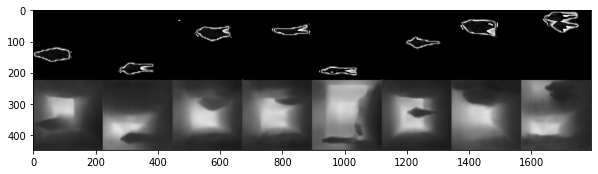

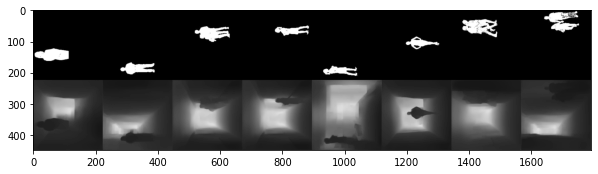

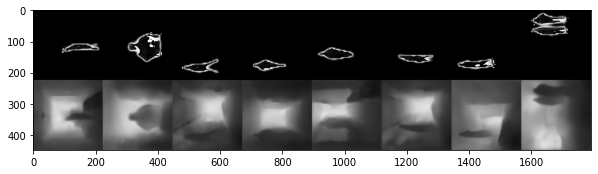

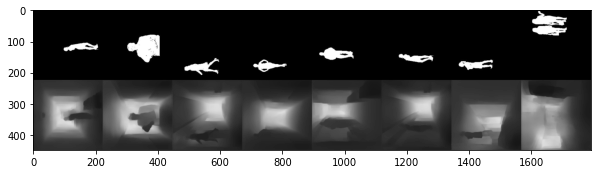

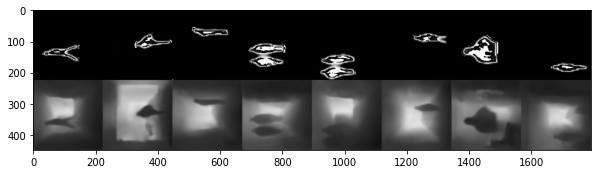

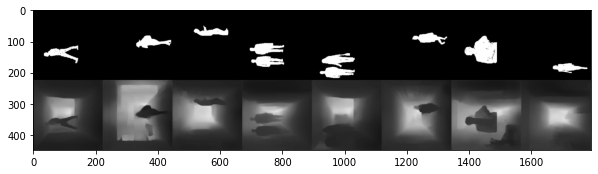

In [45]:
mmdtraintest.display_samples_new(expand_model, test_loader, device)